#### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize

<span style="color:green; font-weight:bold; font-size:24px">Loading Dataset </span>

In [7]:
df = pd.read_csv("online_shoppers_intention.csv")

<span style="color:orange; font-weight:bold; font-size:16px">Original Shape of the Dataset :</span>

In [13]:
print(df.shape)

(12330, 18)


<span style="color:orange; font-weight:bold; font-size:16px"> Class distribution before balancing : :</span>

In [15]:
print(df['Revenue'].value_counts())

Revenue
False    10422
True      1908
Name: count, dtype: int64


<span style="color:green; font-weight:bold; font-size:24px">Balancing the Dataset </span>

In [18]:
# Split into majority and minority
df_majority = df[df['Revenue'] == False]
df_minority = df[df['Revenue'] == True]

In [20]:
# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

In [22]:
# Combine and shuffle the new balanced dataset
df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

 <span style="color:orange; font-weight:bold; font-size:16px">Balanced Dataset Shape</span>

In [27]:
print( df_balanced.shape)

(20844, 18)


In [30]:
df=df_balanced

 <span style="color:orange; font-weight:bold; font-size:16px">Class distribution after balancing:</span>

In [32]:
print("\n", df_balanced['Revenue'].value_counts())


 Revenue
True     10422
False    10422
Name: count, dtype: int64


<span style="color:green; font-weight:bold; font-size:24px"> Preprocessing - Exploratory Data Analysis  </span>

 <span style="color:red; font-weight:bold; font-size:22px">Basic Informations </span>

 <span style="color:orange; font-weight:bold; font-size:20px">Dataset Shape : </span>

In [40]:
print("\n", df.shape)


 (20844, 18)


 <span style="color:orange; font-weight:bold; font-size:20px">First 5 rows of the dataset :</span>

In [42]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    Administrative  Administrative_Duration  Informational  \
0               2               165.133333              0   
1               0                 0.000000              5   
2               2                47.000000              0   
3               0                 0.000000              0   
4              12               397.716667              3   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000              87              3220.336667   
1              194.400000               8               197.900000   
2                0.000000              42              1528.382468   
3                0.000000              23               502.466667   
4              431.333333             336             12595.627760   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004598   0.019540    0.000000         0.0  June                 2   
1     0.036364   0.054545    0.000000     

 <span style="color:orange; font-weight:bold; font-size:20px"> Data Types :</span>

In [47]:
print("\n",df.dtypes)


 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


 <span style="color:orange; font-weight:bold; font-size:20px"> Missing or Null Values :</span>

In [50]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


 <span style="color:orange; font-weight:bold; font-size:20px">Unique Values Per Column :</span>

In [53]:
print("\n", df.nunique())


 Administrative               27
Administrative_Duration    3333
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9547
BounceRates                1871
ExitRates                  4775
PageValues                 2701
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


 <span style="color:orange; font-weight:bold; font-size:20px"> Target Variable Distribution :</span>

In [57]:
print("\n", df['Revenue'].value_counts())


 Revenue
True     10422
False    10422
Name: count, dtype: int64


 <span style="color:orange; font-weight:bold; font-size:20px"> Bar Plot for Target :</span>

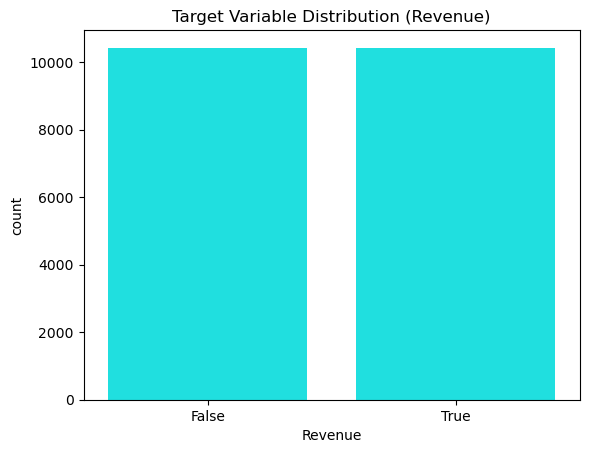

In [59]:
sns.countplot(data=df, x='Revenue',color="cyan")
plt.title("Target Variable Distribution (Revenue)")
plt.show()

 <span style="color:orange; font-weight:bold; font-size:20px"> Summary Statistics :</span>

In [62]:
print("\n", df.describe())


        Administrative  Administrative_Duration  Informational  \
count    20844.000000             20844.000000   20844.000000   
mean         2.770773                95.733439       0.626175   
std          3.546828               186.524344       1.400495   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                27.533333       0.000000   
75%          4.000000               114.259158       1.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            20844.000000    20844.000000             20844.000000   
mean                44.830456       38.582422              1484.121220   
std                156.410853       51.300578              2121.610033   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000       10.000

 <span style="color:orange; font-weight:bold; font-size:20px"> Correlation Matrix :</span>

In [65]:
numeric_df = df.select_dtypes(include=['int64', 'float64']) # As .corr() method only works on numeric columns

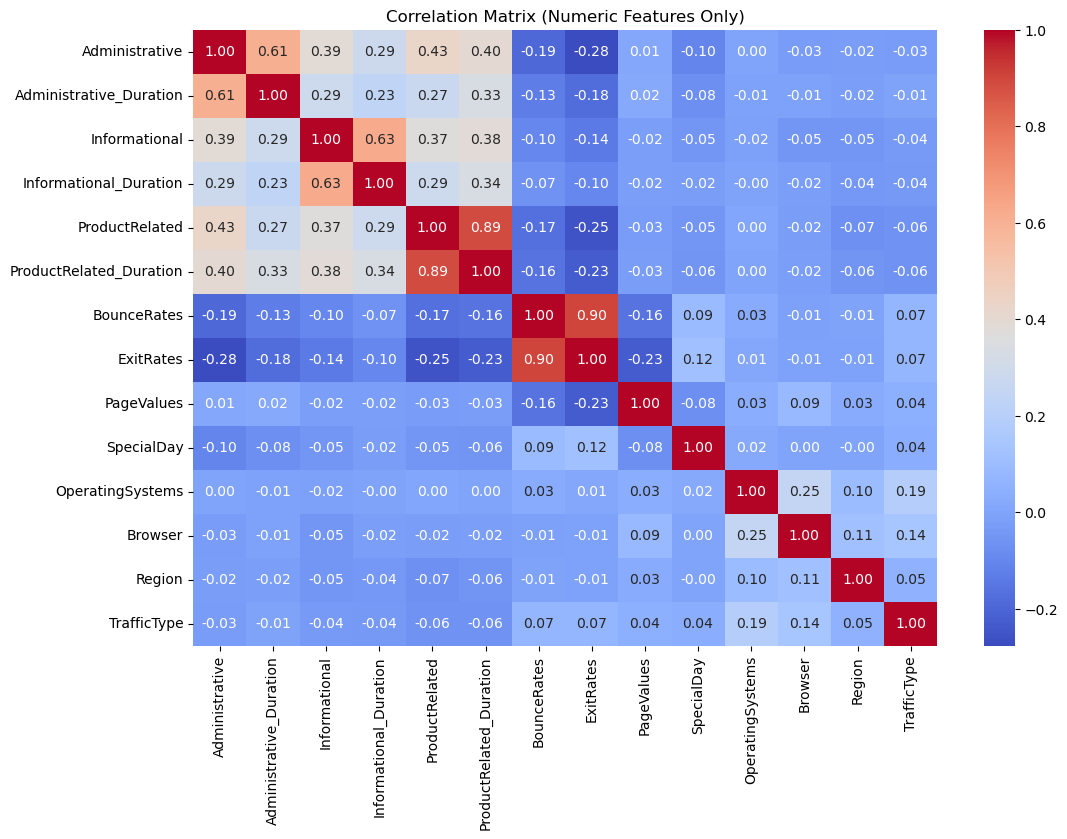

In [67]:
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

 <span style="color:orange; font-weight:bold; font-size:20px">  Categorical Variable Analysis :</span>

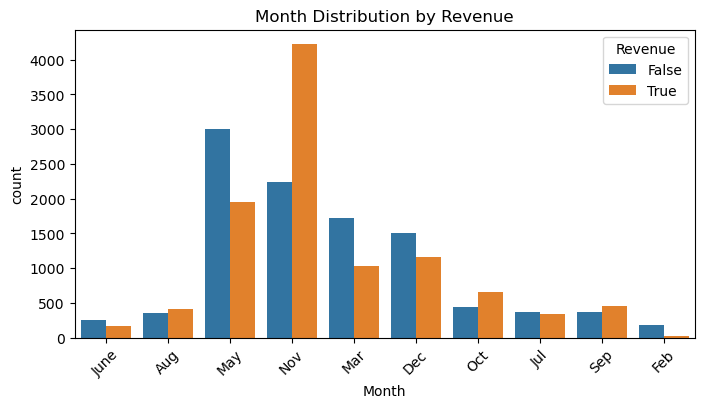

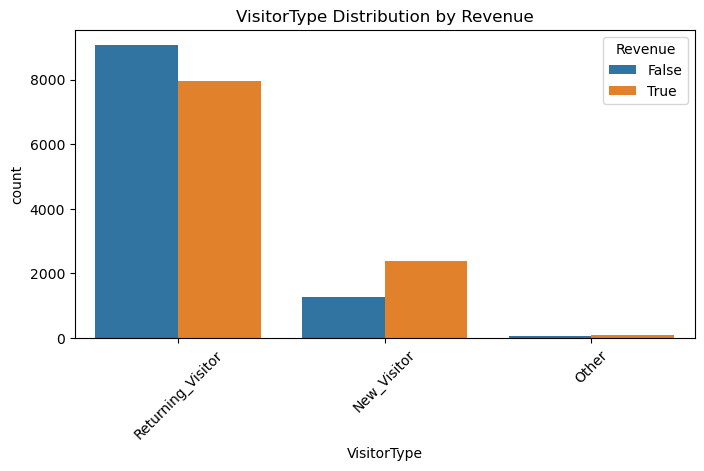

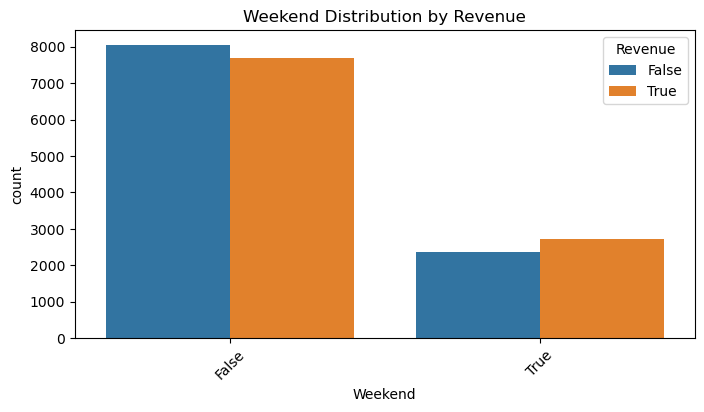

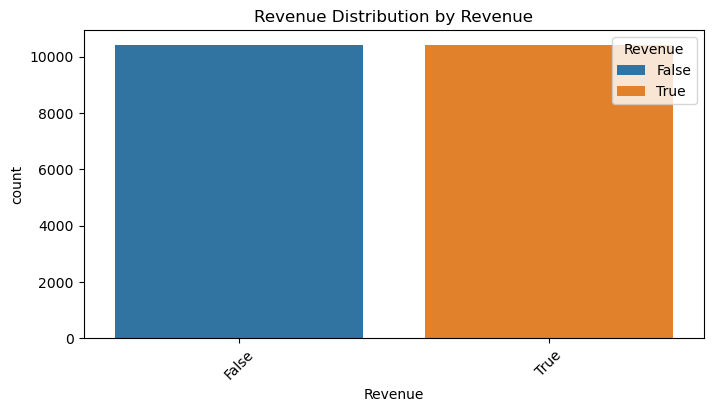

In [70]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Revenue')
    plt.title(f"{col} Distribution by Revenue")
    plt.xticks(rotation=45)
    plt.show()

 <span style="color:orange; font-weight:bold; font-size:20px">  Numerical Feature Distribution :</span>

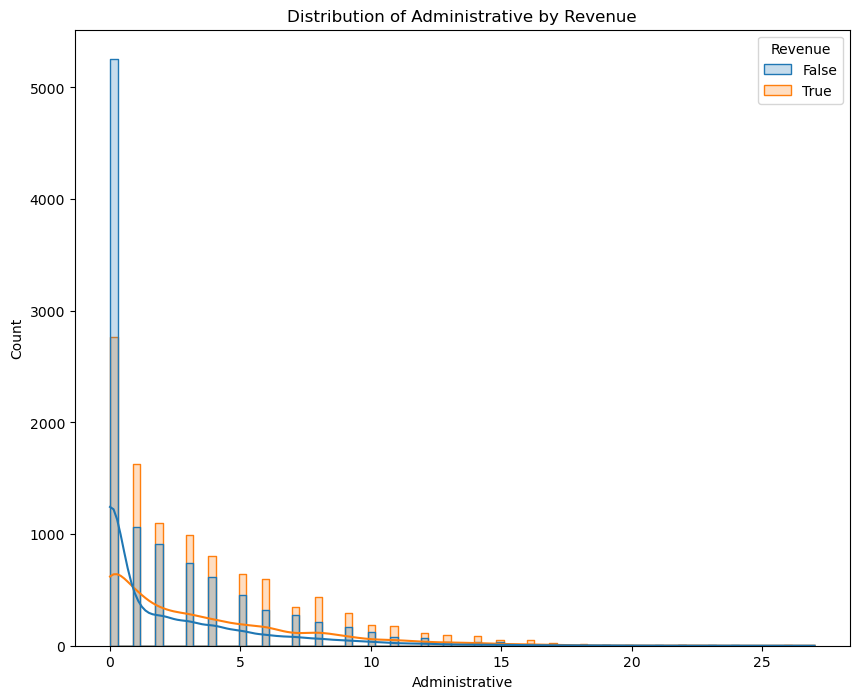

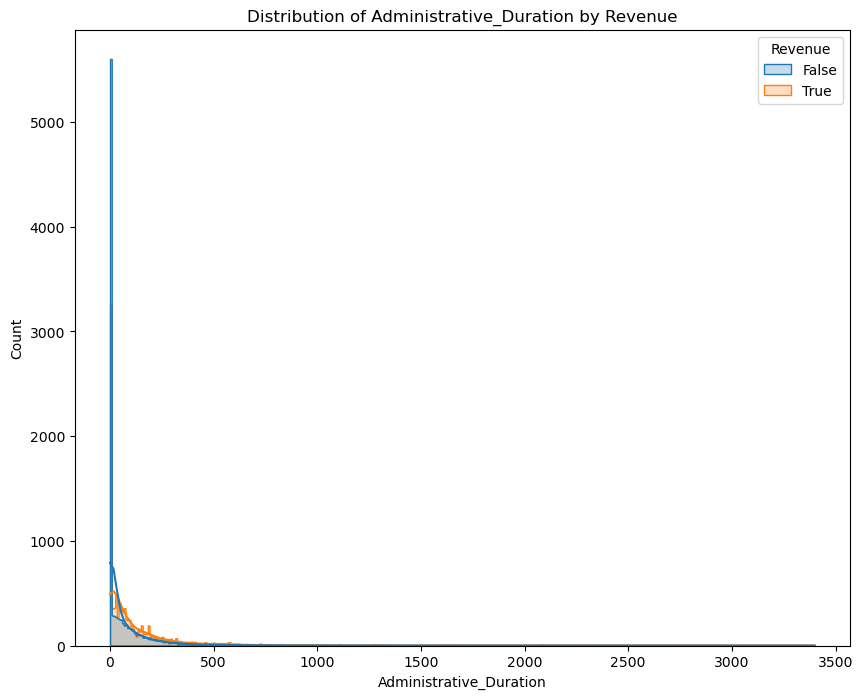

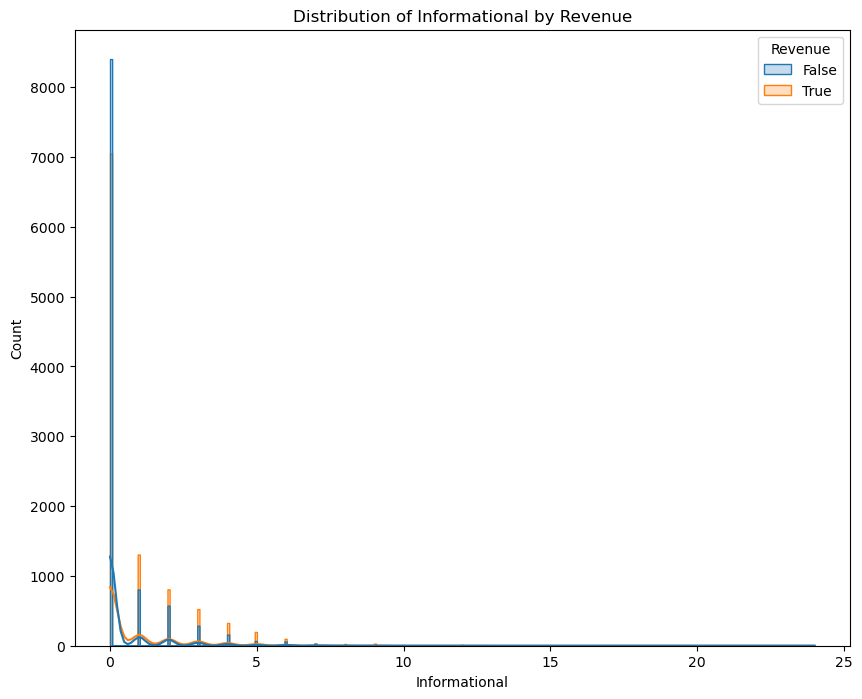

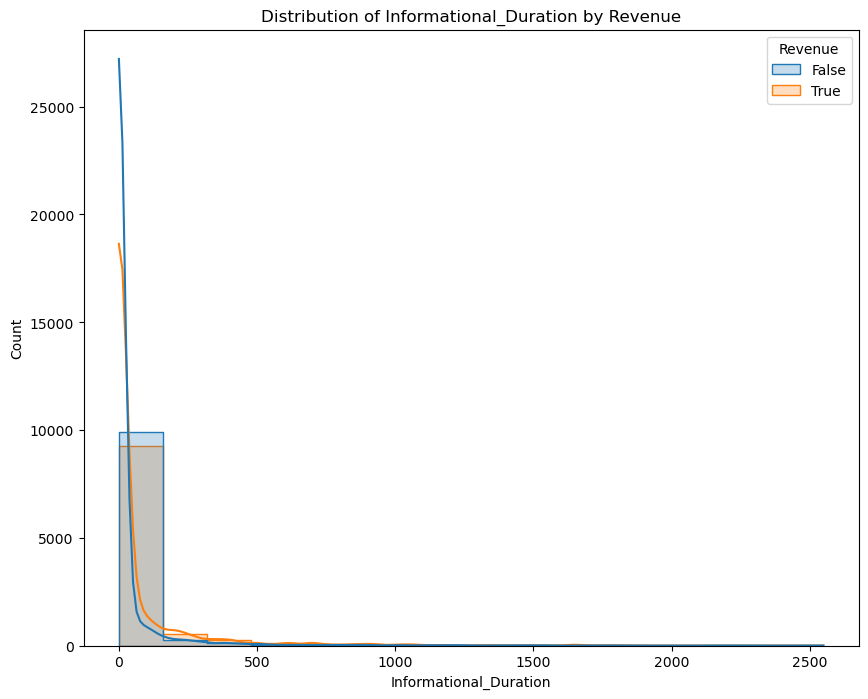

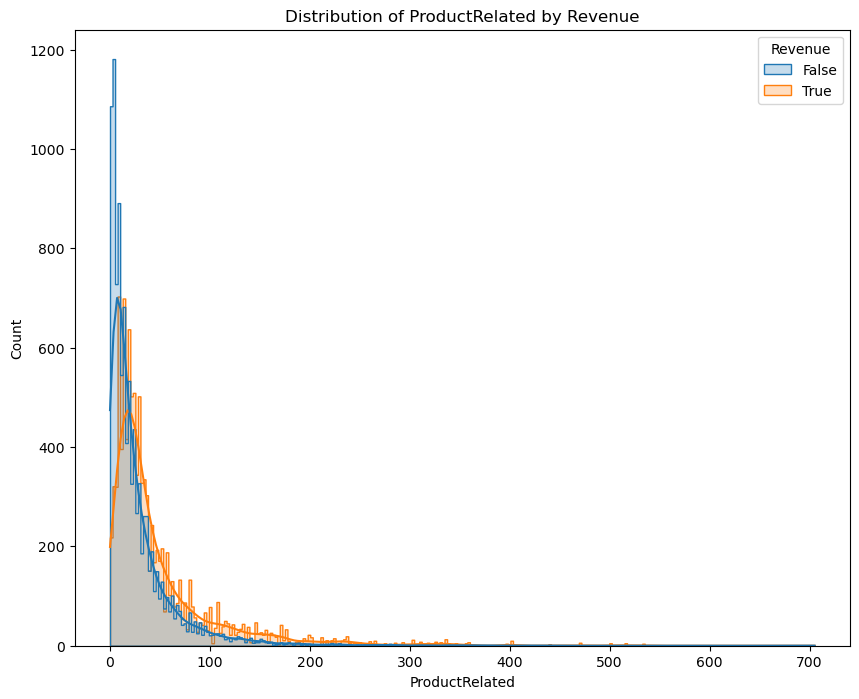

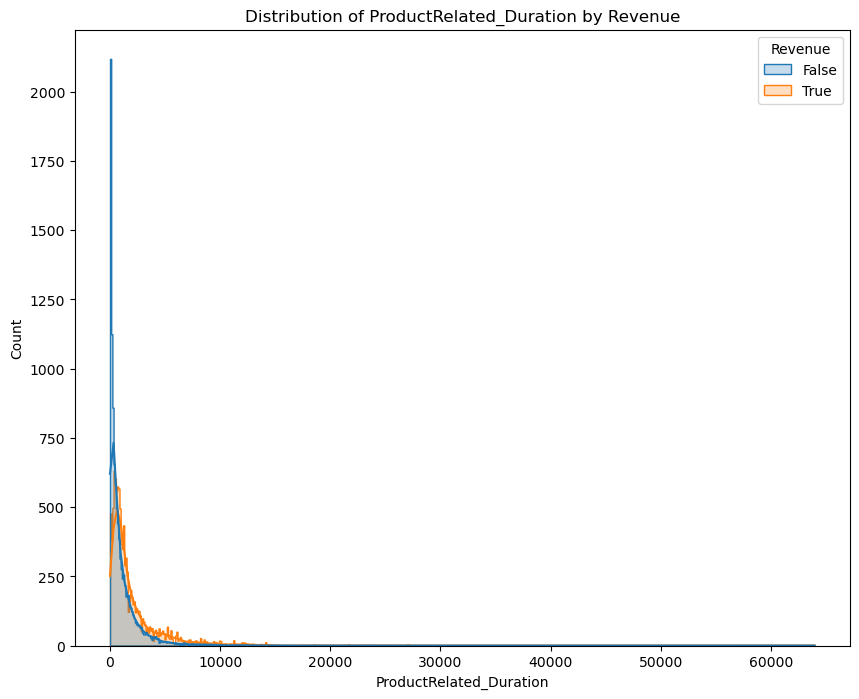

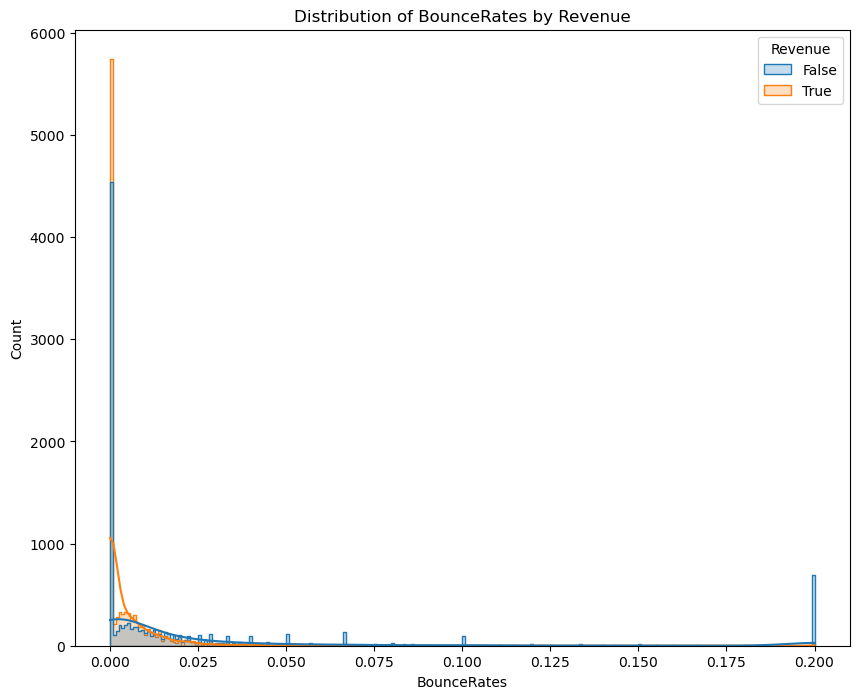

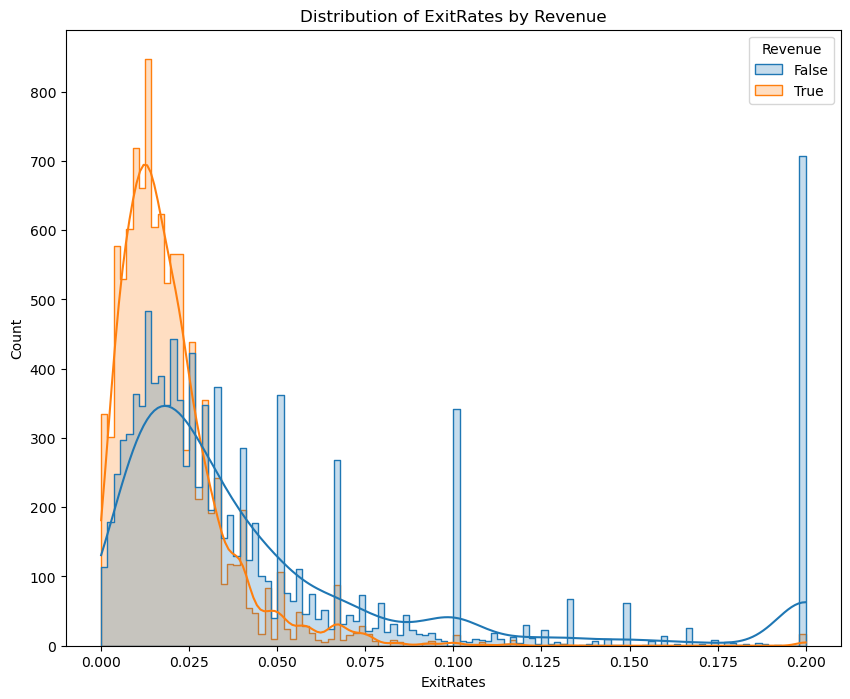

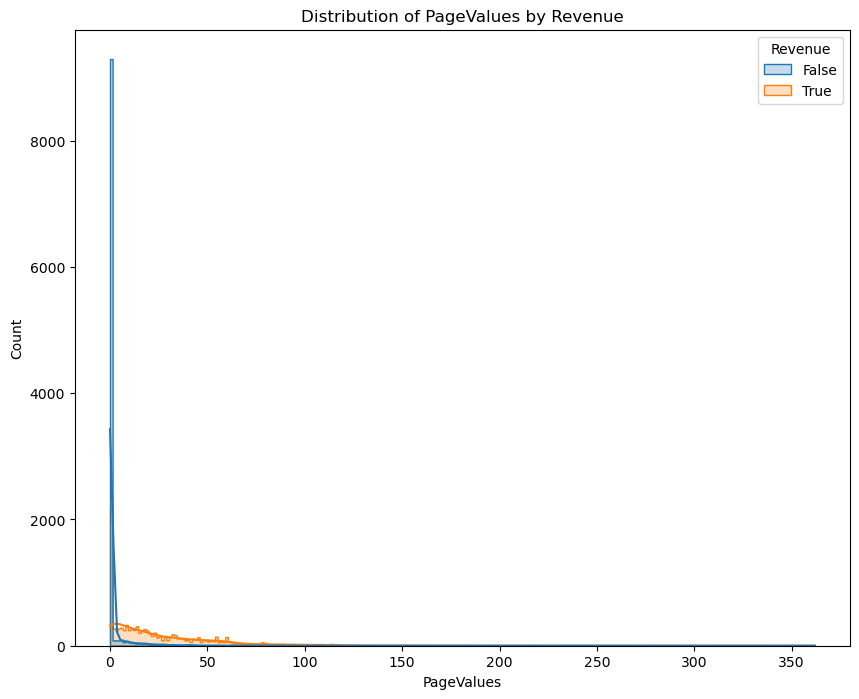

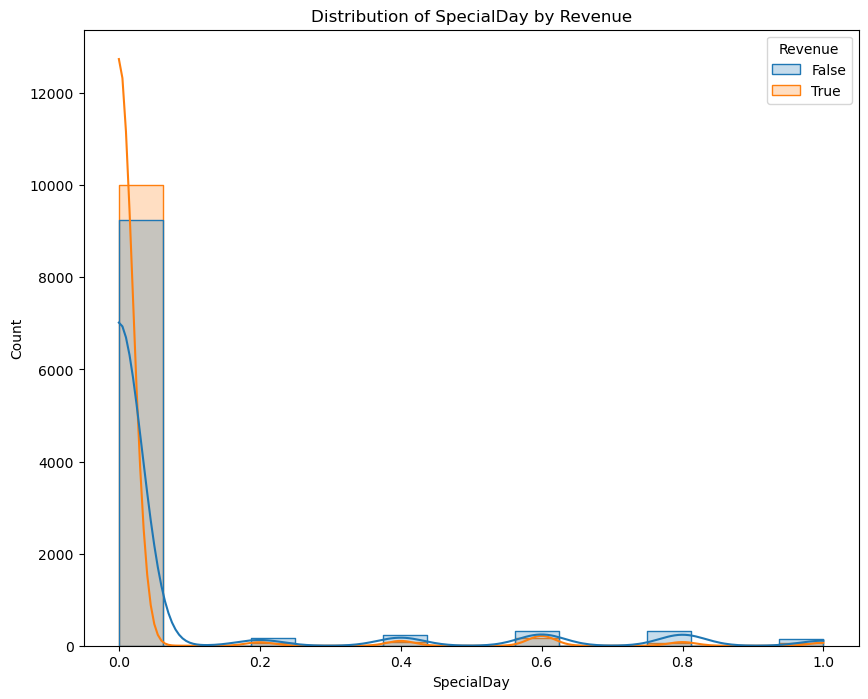

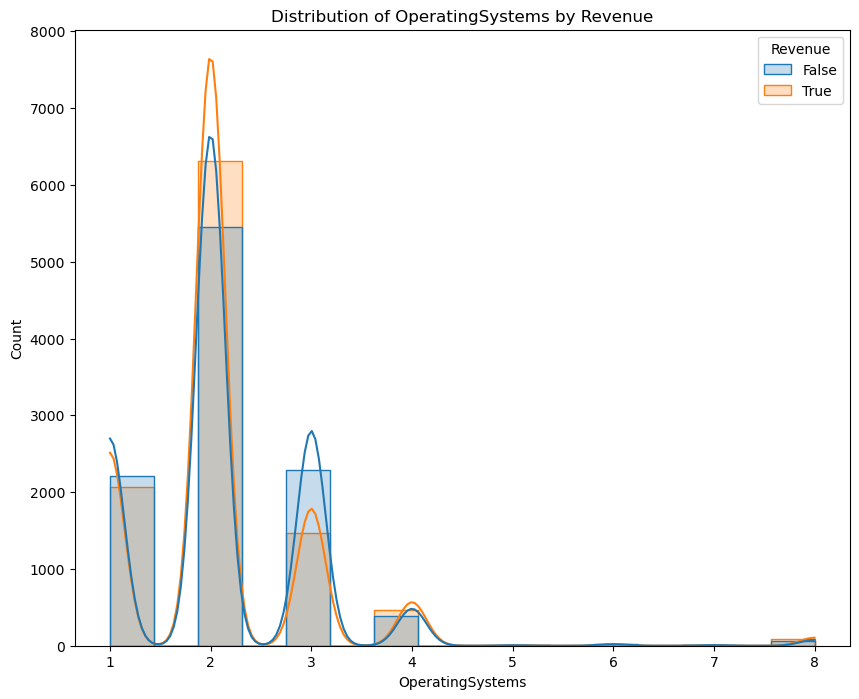

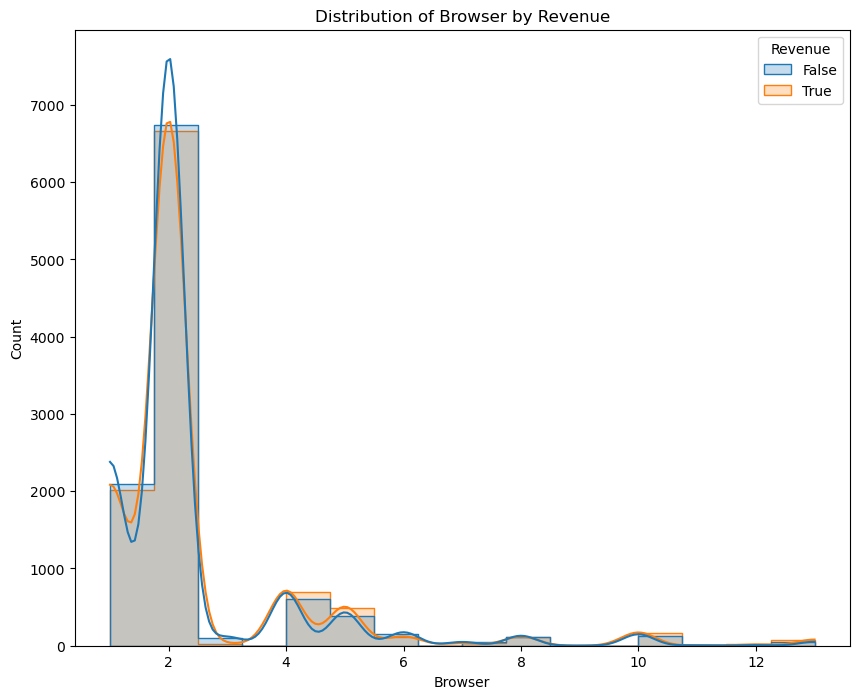

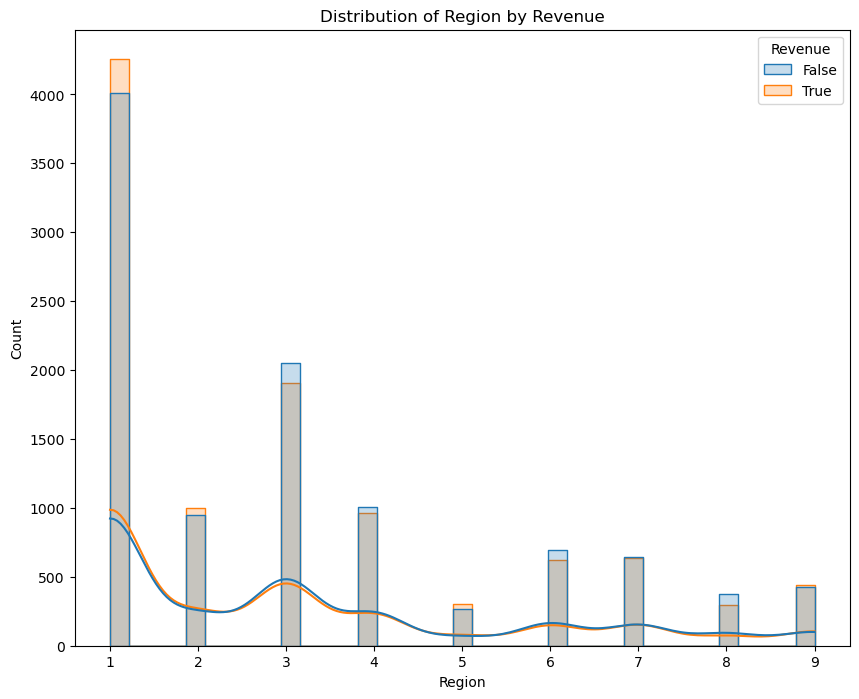

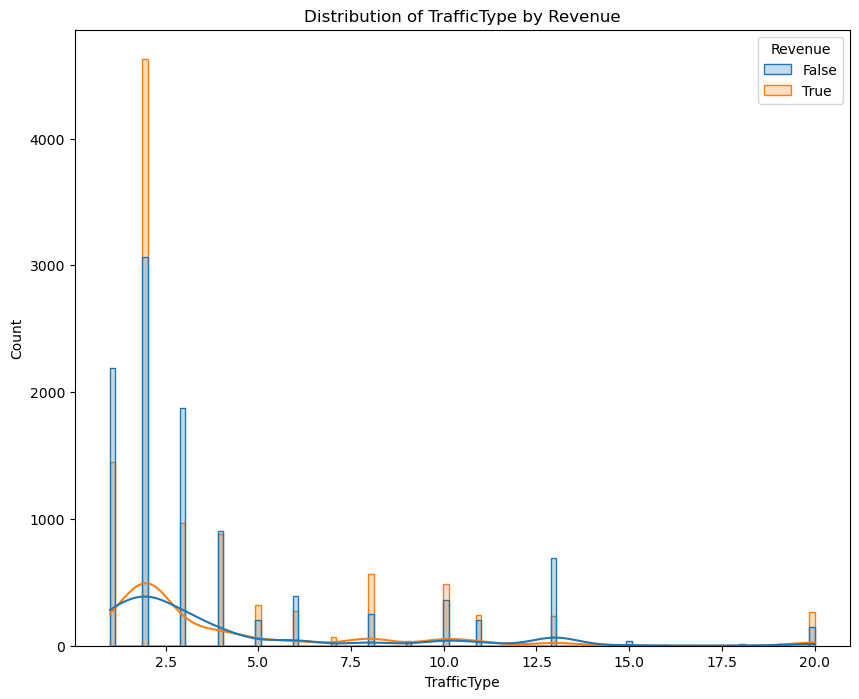

In [73]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Only remove 'Revenue' if it's present
if 'Revenue' in numerical_cols:
    numerical_cols.remove('Revenue')

for col in numerical_cols:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=col, kde=True, hue='Revenue', element='step', common_norm=False)
    plt.title(f"Distribution of {col} by Revenue")
    plt.show()

 <span style="color:orange; font-weight:bold; font-size:20px">  Boxplots for Outlier Detection and Handling:</span>

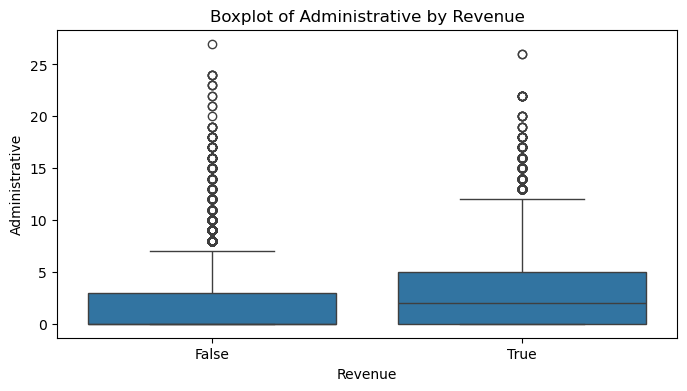

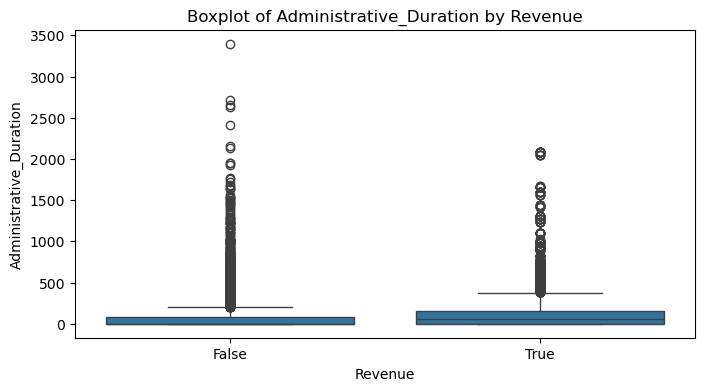

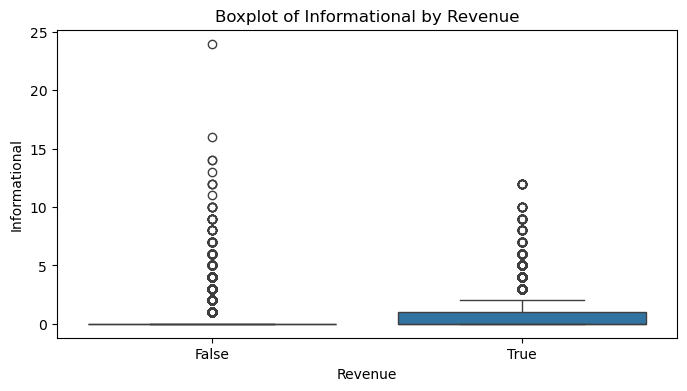

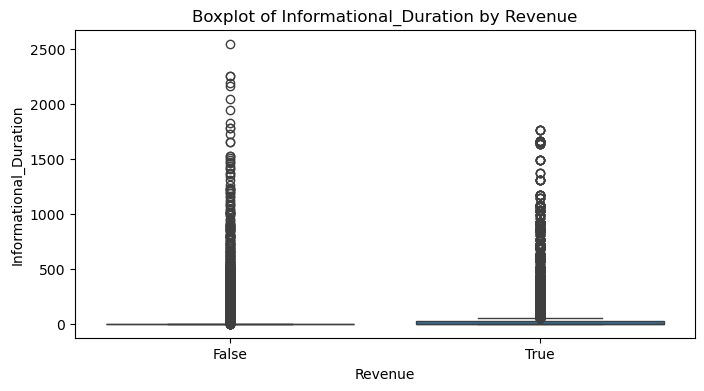

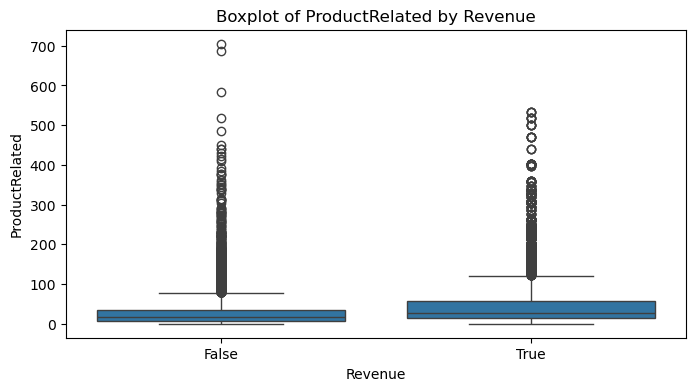

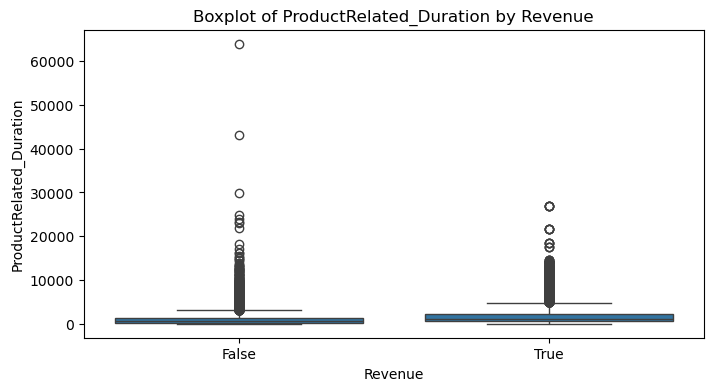

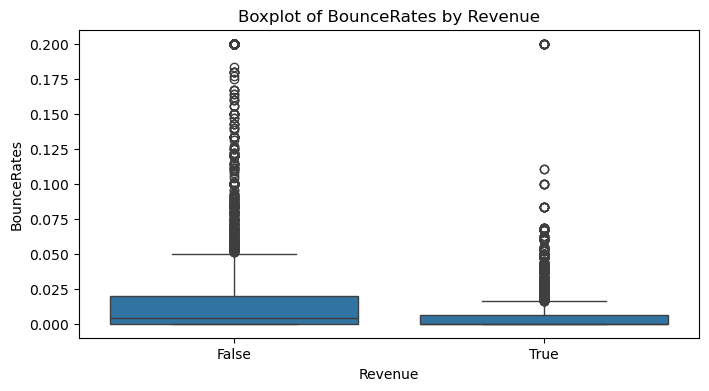

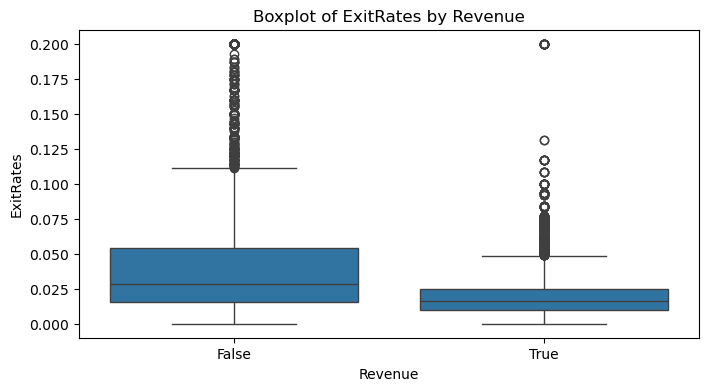

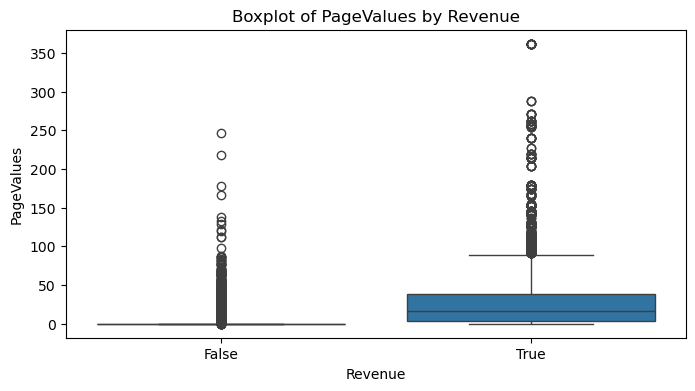

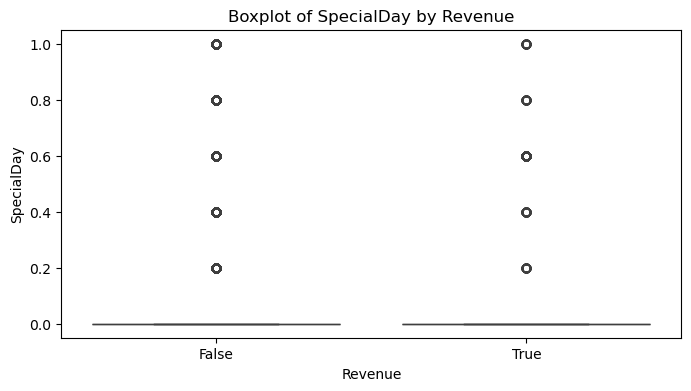

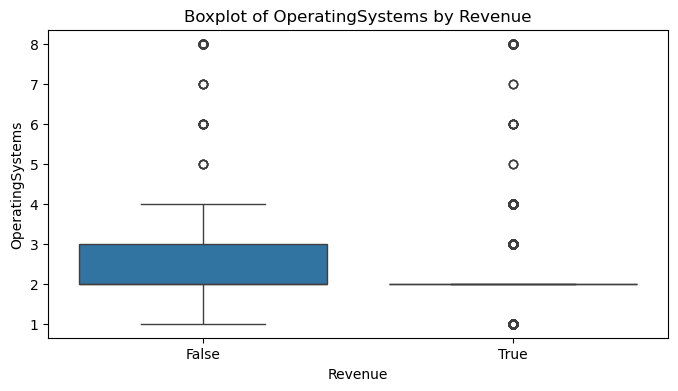

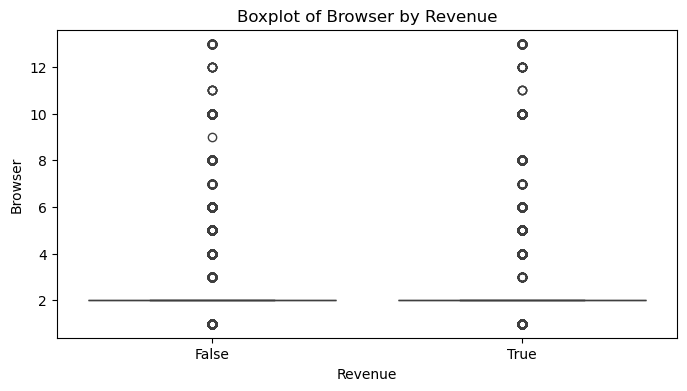

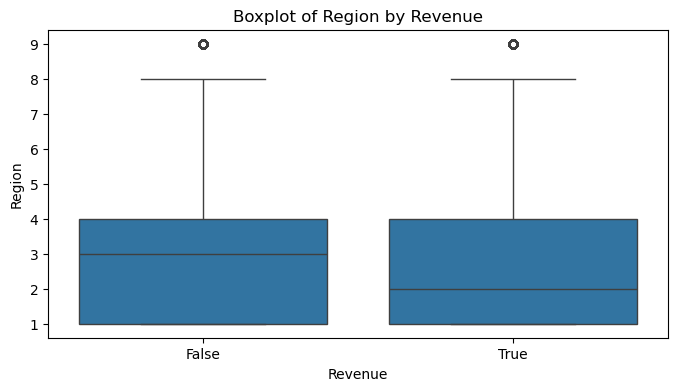

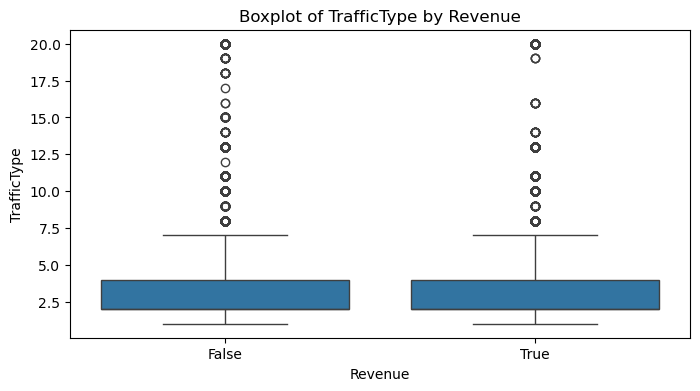

In [76]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Revenue', y=col)
    plt.title(f"Boxplot of {col} by Revenue")
    plt.show()

<span style="color:green; font-weight:bold; font-size:24px"> Encoding and Feature Scaling  </span>

In [105]:
print(df_balanced.select_dtypes(include=['object', 'bool']).columns)

Index([], dtype='object')


In [107]:
df_balanced[col] = df_balanced[col].fillna("missing")

In [109]:
label_encoders = {}
for col in df_balanced.select_dtypes(include=['object', 'bool']).columns:
    df_balanced[col] = df_balanced[col].fillna("missing")  # Prevent NaN issues
    le = LabelEncoder()
    df_balanced.loc[:, col] = le.fit_transform(df_balanced[col])
    label_encoders[col] = le

In [113]:
# Convert boolean to integers
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [119]:
# Get numerical columns safely
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'Revenue']

In [121]:
# Step 2: Outlier Detection & Winsorization
from scipy.stats.mstats import winsorize

for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

In [125]:
# Step 3: Splitting Features & Labels
X = df.drop('Revenue', axis=1)
y = df['Revenue']

 <span style="color:orange; font-weight:bold; font-size:20px"> Feature Scaling:</span>

In [127]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [129]:
# Step 5: Balancing the Dataset with SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled, y)

 <span style="color:orange; font-weight:bold; font-size:20px"> Train/Test Split:</span>

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)


RandomForestClassifier(random_state=42)

 <span style="color:orange; font-weight:bold; font-size:20px"> Training the model:</span>

In [138]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 <span style="color:orange; font-weight:bold; font-size:20px"> Making Predictions :</span>

In [141]:
y_pred = model.predict(X_test)

 <span style="color:red; font-weight:bold; font-size:20px"> Evaluating the model:</span>

 <span style="color:orange; font-weight:bold; font-size:16px"> Classification Report:</span>

In [147]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2110
           1       0.94      0.99      0.97      2059

    accuracy                           0.96      4169
   macro avg       0.97      0.97      0.96      4169
weighted avg       0.97      0.96      0.96      4169



 <span style="color:orange; font-weight:bold; font-size:16px"> Confusion Matrix:</span>

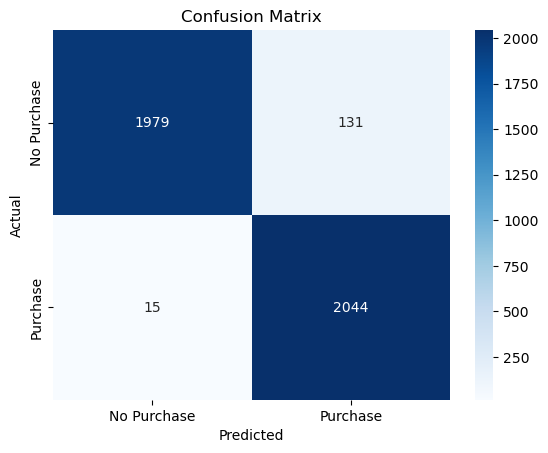

In [149]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 <span style="color:red; font-weight:bold; font-size:20px"> Test Prediction with New User Input:</span> 

In [185]:
from sklearn.preprocessing import StandardScaler

# Assuming you have the training dataframe `df`
# Exclude the target column 'Revenue' if it's still there
features = df.drop(columns=['Revenue'])

# Select numeric columns (if needed)
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler
scaler = StandardScaler()
scaler.fit(features[numeric_cols])

StandardScaler()

In [187]:
new_user = {
    'Administrative': 2,
    'Administrative_Duration': 30.5,
    'Informational': 1,
    'Informational_Duration': 15.0,
    'ProductRelated': 20,
    'ProductRelated_Duration': 300.0,
    'BounceRates': 0.01,
    'ExitRates': 0.02,
    'PageValues': 5.0,
    'SpecialDay': 0.0,
    'Month': 10, #November
    'OperatingSystems': 2,
    'Browser': 2,
    'Region': 1,
    'TrafficType': 3,
    'VisitorType': 1,
    'Weekend': 1
}

In [206]:
# Manually define the correct feature order (must match training)
feature_order = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
    'Month', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend'
]

In [210]:
prediction = model.predict(new_df_scaled)
print("Predicted Revenue:", "Purchase" if prediction[0] == 1 else "No Purchase")

Predicted Revenue: Purchase


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
